In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

In [2]:
df=pd.read_csv('Cellphone.csv')

In [3]:
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [4]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

C:\Users\Анна\AppData\Local\Temp\ipykernel_5784\3098497061.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], bins=30)


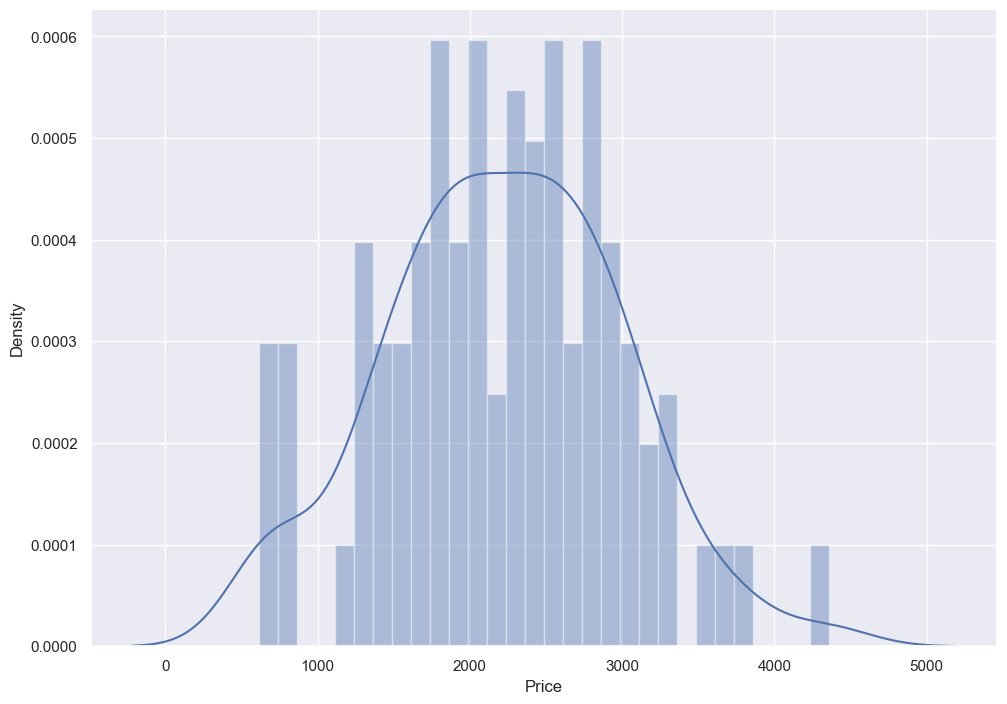

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Price'], bins=30)
plt.show()

<Axes: >

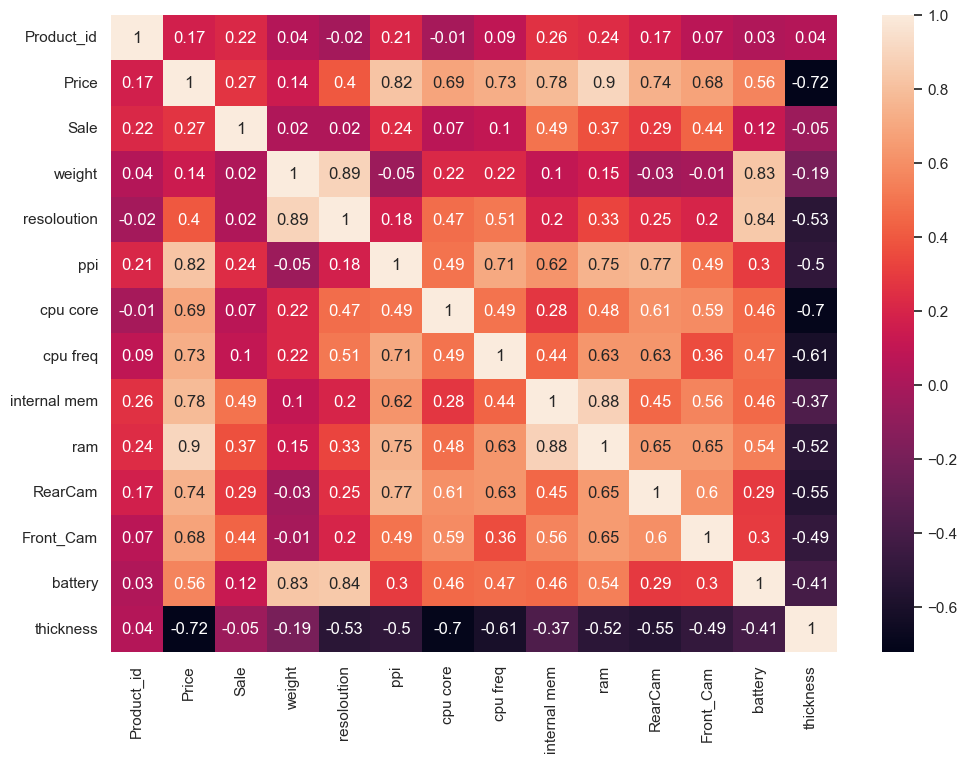

In [9]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

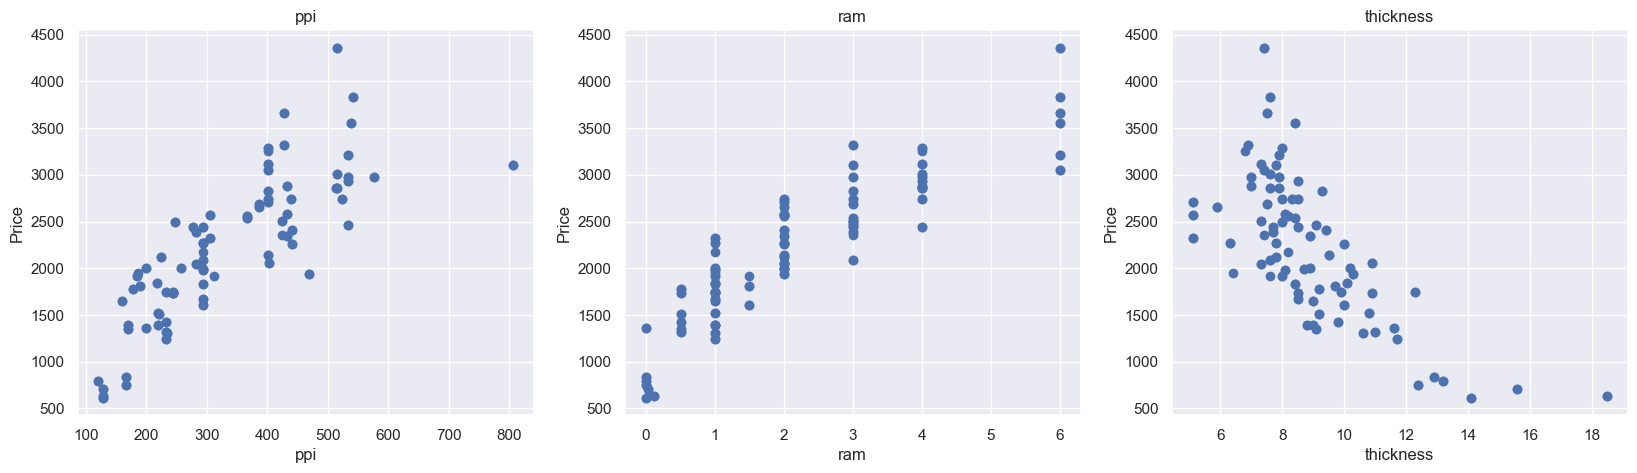

In [10]:
plt.figure(figsize=(20, 5))

features = ['ppi', 'ram', 'thickness']
target = df['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

In [11]:
X = pd.DataFrame(np.c_[df['ram'], df['ppi'], df['thickness']], columns = ['ram','ppi', 'thickness'])
Y = df['Price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 3)
(33, 3)
(128,)
(33,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [20]:
y_train_predict = lin_model.predict(X_train)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = lin_model.predict(X_test)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
R2 score is 0.918227828821525


The model performance for testing set
--------------------------------------
R2 score is 0.9134860175619428


In [23]:
X1 = df[['ram']]
Y1 = df['Price']

In [24]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=0)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(128, 1)
(33, 1)
(128,)
(33,)


In [25]:
lin_model1 = LinearRegression()
lin_model1.fit(X1_train, Y1_train)

LinearRegression()

In [26]:
y_train_predict1 = lin_model1.predict(X1_train)
r2 = r2_score(Y1_train, y_train_predict1)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict1 = lin_model1.predict(X1_test)
r2 = r2_score(Y1_test, y_test_predict1)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
R2 score is 0.8157874910587051


The model performance for testing set
--------------------------------------
R2 score is 0.7385710855112582


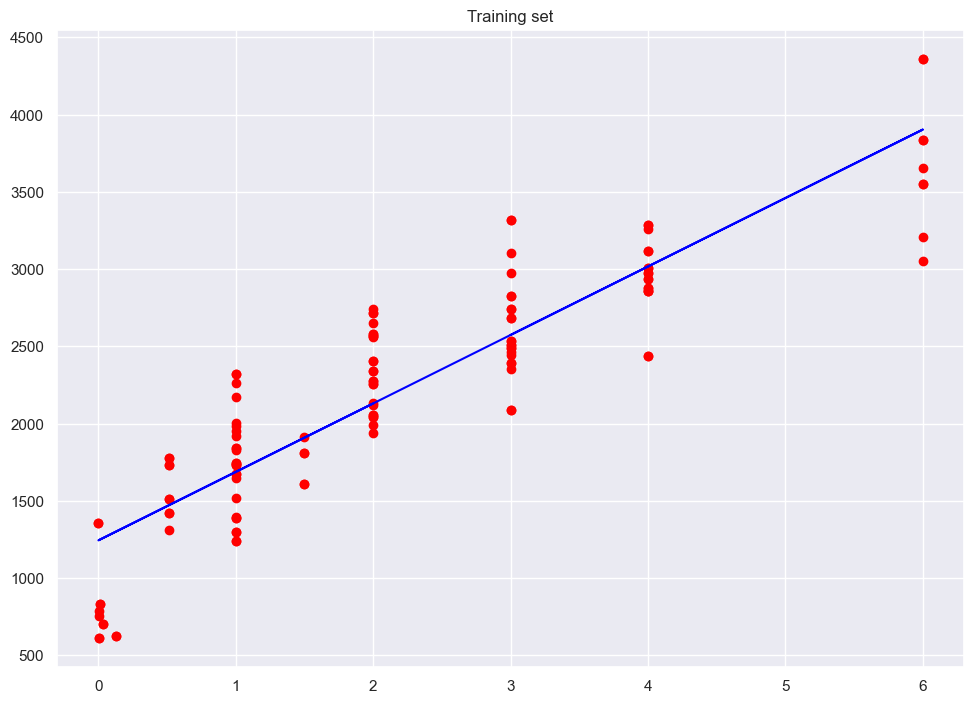

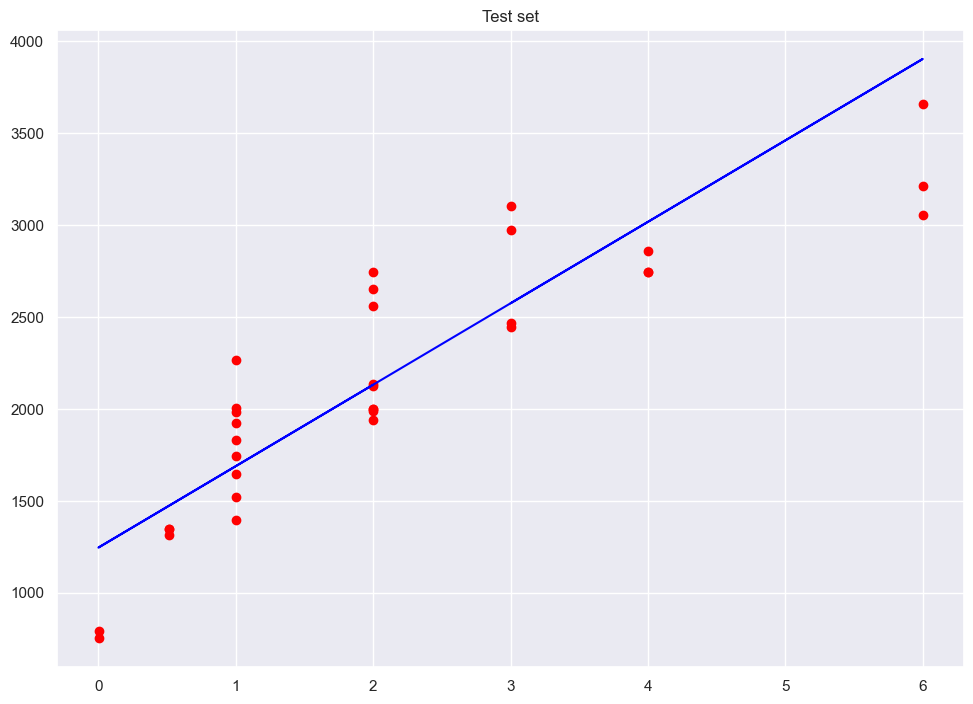

In [38]:
plt.scatter(X1_train, Y1_train, color='red')
plt.plot(X1_train, lin_model1.predict(X1_train), color='blue')
plt.title('Training set')
plt.show()

plt.scatter(X1_test, Y1_test, color='red')
plt.plot(X1_train, lin_model1.predict(X1_train), color='blue')
plt.title('Test set')
plt.show()

In [27]:
X2 = df[['ppi']]
Y2 = df['Price']

In [28]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state=0)
print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(128, 1)
(33, 1)
(128,)
(33,)


In [29]:
lin_model2 = LinearRegression()
lin_model2.fit(X2_train, Y2_train)

LinearRegression()

In [30]:
y_train_predict2 = lin_model2.predict(X2_train)
r2 = r2_score(Y2_train, y_train_predict2)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict2 = lin_model2.predict(X2_test)
r2 = r2_score(Y2_test, y_test_predict2)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
R2 score is 0.6876892975441218


The model performance for testing set
--------------------------------------
R2 score is 0.5479855277437812


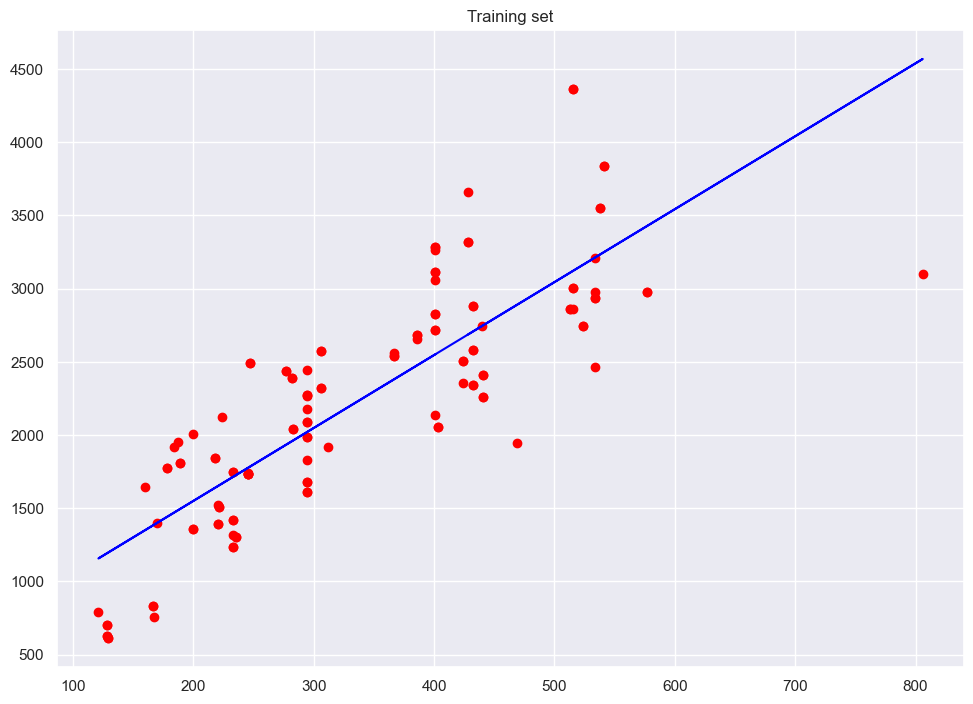

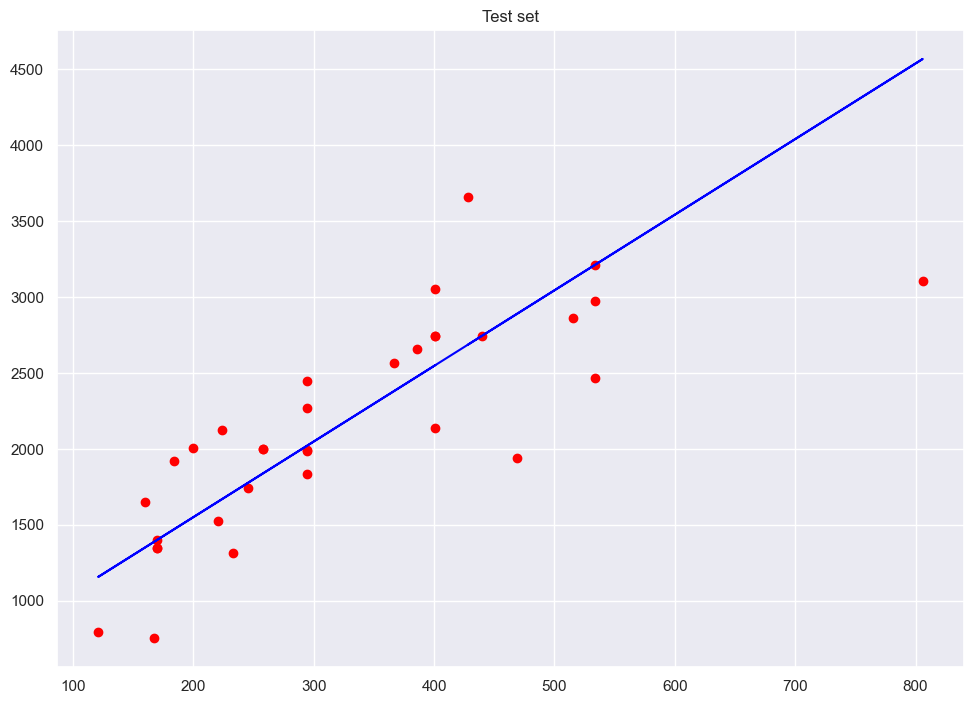

In [37]:
plt.scatter(X2_train, Y2_train, color='red')
plt.plot(X2_train, lin_model2.predict(X2_train), color='blue')
plt.title('Training set')
plt.show()

plt.scatter(X2_test, Y2_test, color='red')
plt.plot(X2_train, lin_model2.predict(X2_train), color='blue')
plt.title('Test set')
plt.show()

In [31]:
X3 = df[['thickness']]
Y3 = df['Price']

In [32]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.2, random_state=0)
print(X3_train.shape)
print(X3_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)

(128, 1)
(33, 1)
(128,)
(33,)


In [33]:
lin_model3 = LinearRegression()
lin_model3.fit(X3_train, Y3_train)

LinearRegression()

In [34]:
y_train_predict3 = lin_model3.predict(X3_train)
r2 = r2_score(Y3_train, y_train_predict3)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict3 = lin_model3.predict(X3_test)
r2 = r2_score(Y3_test, y_test_predict3)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
R2 score is 0.5160272116223437


The model performance for testing set
--------------------------------------
R2 score is 0.4938150175602244


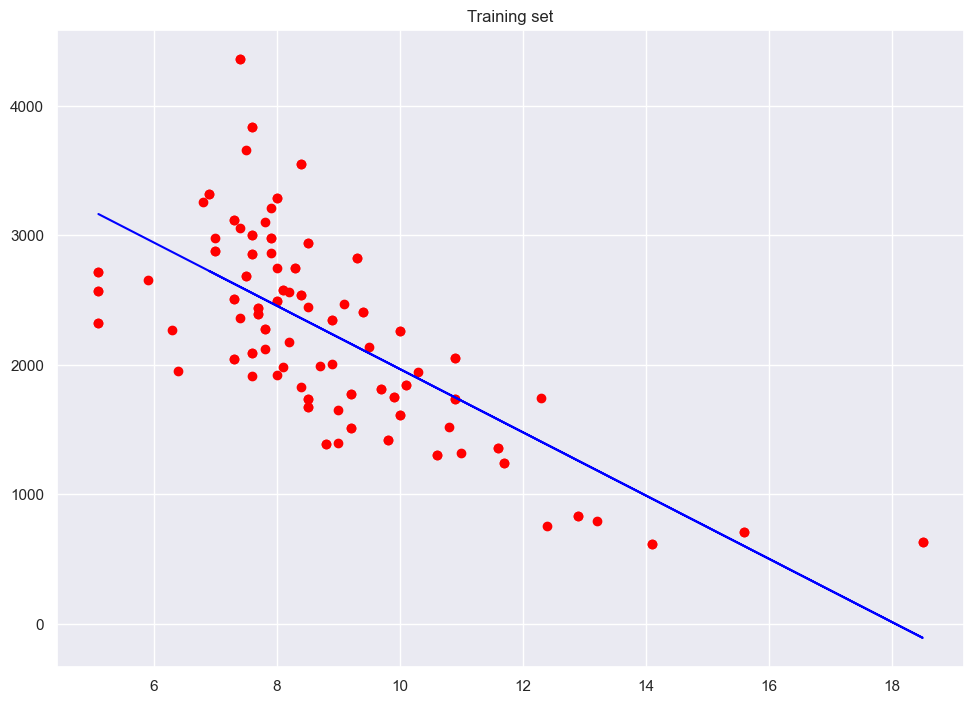

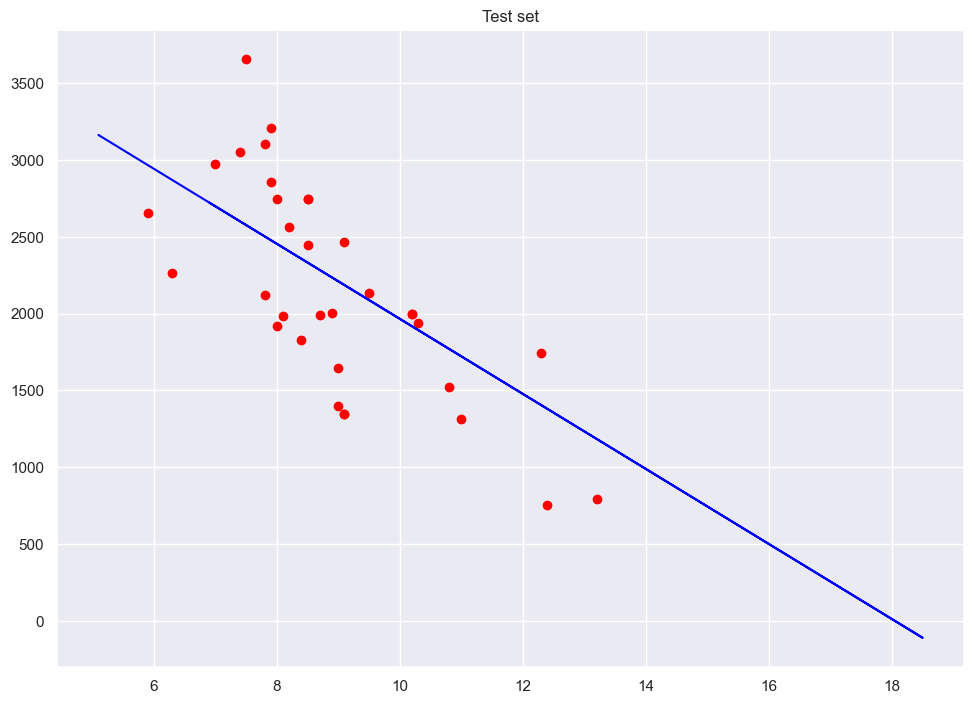

In [36]:
plt.scatter(X3_train, Y3_train, color='red')
plt.plot(X3_train, lin_model3.predict(X3_train), color='blue')
plt.title('Training set')
plt.show()

plt.scatter(X3_test, Y3_test, color='red')
plt.plot(X3_train, lin_model3.predict(X3_train), color='blue')
plt.title('Test set')
plt.show()